<a href="https://colab.research.google.com/github/SnipeHunting/MQ135-Air-Quality-with-ST7735-Display/blob/master/RiskPortfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
# https://riskfolio-lib.readthedocs.io/en/latest/plot.html
#import sys
#!{sys.executable} -m pip install pybind11
#!{sys.executable} -m pip install riskfolio-lib
#!{sys.executable} -m pip install yfinance
#!{sys.executable} -m pip install mosek

#!{sys.executable} -m  pip uninstall matplotlib
#!{sys.executable} -m pip install matplotlib==3.1.3

#!{sys.executable} -m  pip uninstall matplotlib
#!{sys.executable} -m pip install matplotlib==3.3.2
#!{sys.executable} -m pip install matplotlib --upgrade

import numpy as np
import pandas as pd
import yfinance as yf
import riskfolio as rp
import riskfolio.src.Portfolio as pf
import datetime as dt
import plotly.graph_objects as go

In [70]:
# Date range
#start = '2016-01-01'
#end = '2019-12-30'

end = dt.datetime.now()
start = end-dt.timedelta(days=800)

# Tickers of assets
tickers = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
           'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
           'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
tickers.sort()

# Downloading the data
data = yf.download(tickers, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = tickers
assets = data.pct_change().dropna()



[*********************100%***********************]  25 of 25 completed


In [124]:
Y = assets

# Creating the Portfolio Object
port = rp.Portfolio(returns=Y)

# To display dataframes values in percentage format
pd.options.display.float_format = '{:.4%}'.format

# Choose the risk measure
rm = 'MSV'  # Semi Standard Deviation

# Estimate inputs of the model (historical estimates)
method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate the portfolio that maximizes the risk adjusted return ratio
w1 = port.optimization(model='Classic', rm=rm, obj='Sharpe', rf=0.0, l=0, hist=True)

# Estimate points in the efficient frontier mean - semi standard deviation
ws = port.efficient_frontier(model='Classic', rm=rm, points=20, rf=0, hist=True)

# Estimate the risk parity portfolio for semi standard deviation
w2 = port.rp_optimization(model='Classic', rm=rm, rf=0, b=None, hist=True)

# Estimate optimal portfolio:

model='Classic' # Could be Classic(historical), BL(Black Litterman), FM(Factor Model) or BL_FM(Black litterman with factors)
rm = 'MV' # Risk measure used, there are 13 available risk measures
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
#display(w)

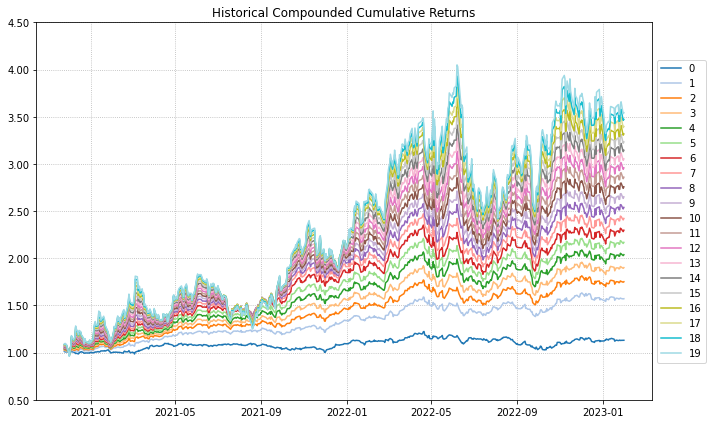

In [122]:
ax = rp.plot_series(returns=Y, w=ws, cmap='tab20', height=6, width=10,
                    ax=None)

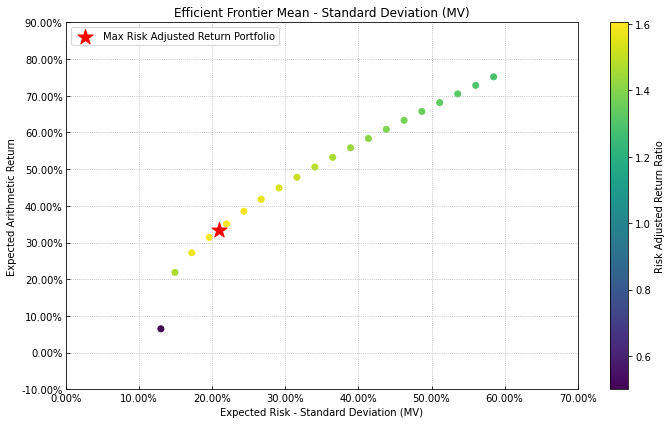

In [127]:
mu = port.mu
cov = port.cov
returns = port.returns
label = 'Max Risk Adjusted Return Portfolio'

ax = rp.plot_frontier(w_frontier=ws, mu=mu, cov=cov, returns=returns,
                       rm=rm, rf=0, alpha=0.05, cmap='viridis', w=w1,
                       label=label, marker='*', s=16, c='r',
                       height=6, width=10, t_factor=252, ax=None)

#Create a chart with the asset composition of the efficient frontier.

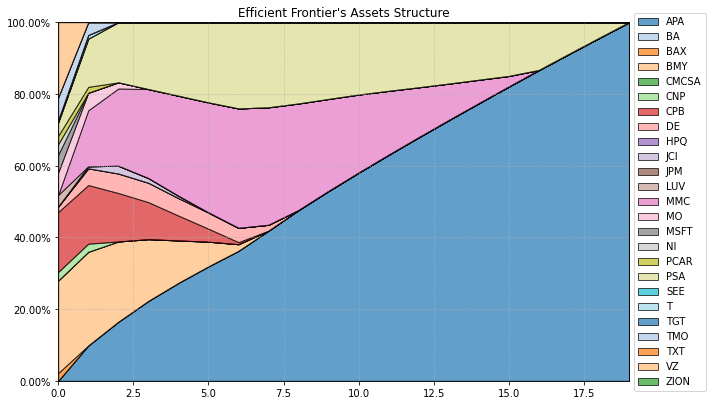

In [74]:
ax = rp.plot_frontier_area(w_frontier=ws, cmap="tab20", height=6,
                           width=10, ax=None)

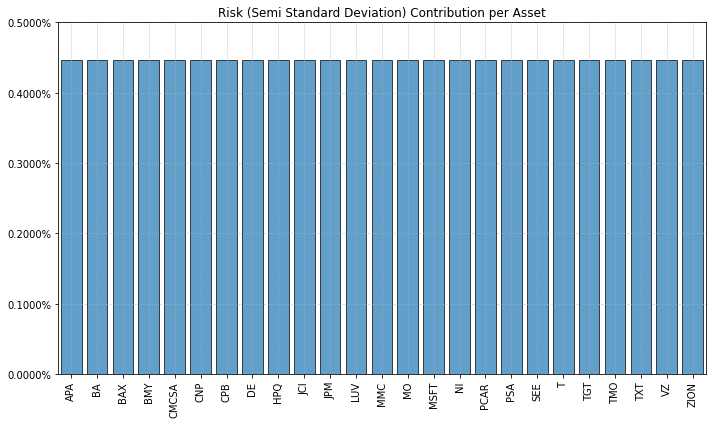

In [75]:
ax = rp.plot_risk_con(w=w2, cov=cov, returns=returns, rm=rm,
                      rf=0, alpha=0.05, color="tab:blue", height=6,
                      width=10, t_factor=252, ax=None)

/usr/local/lib/python3.8/dist-packages/riskfolio/src/RiskFunctions.py:436: RuntimeWarning: overflow encountered in exp
  value = np.mean(np.exp(-1 / z * a), axis=0)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


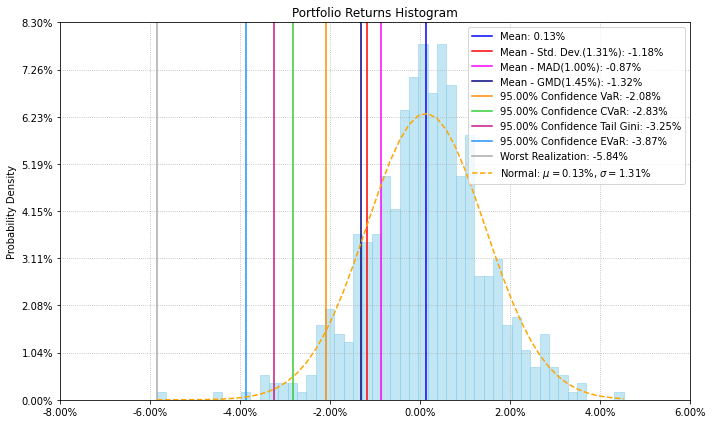

In [130]:
ax = rp.plot_hist(returns=Y, w=w1, alpha=0.05, bins=50, height=6,
                  width=10, ax=None)

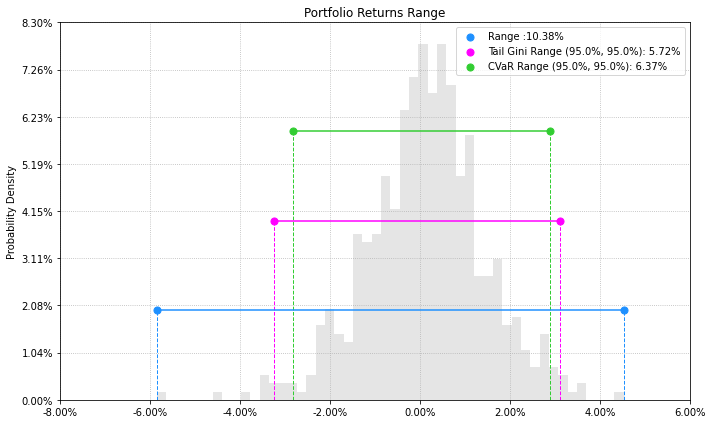

In [77]:
ax = rp.plot_range(returns=Y, w=w1, alpha=0.05, a_sim=100, beta=None,
                b_sim=None, bins=50, height=6, width=10, ax=None)

/usr/local/lib/python3.8/dist-packages/riskfolio/src/RiskFunctions.py:436: RuntimeWarning: overflow encountered in exp
  value = np.mean(np.exp(-1 / z * a), axis=0)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


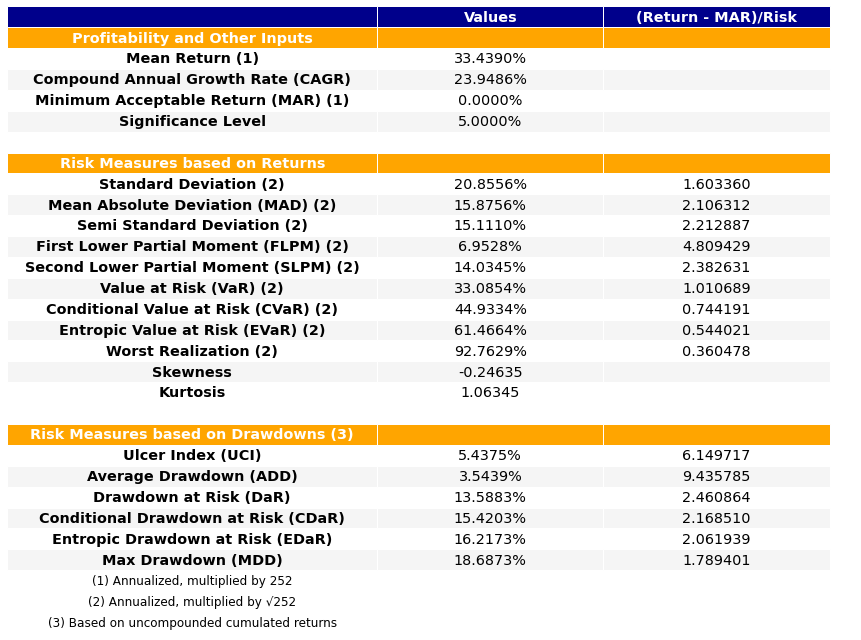

In [113]:
ax = rp.plot_table(returns=Y, w=w1, MAR=0, alpha=0.05, ax=None)

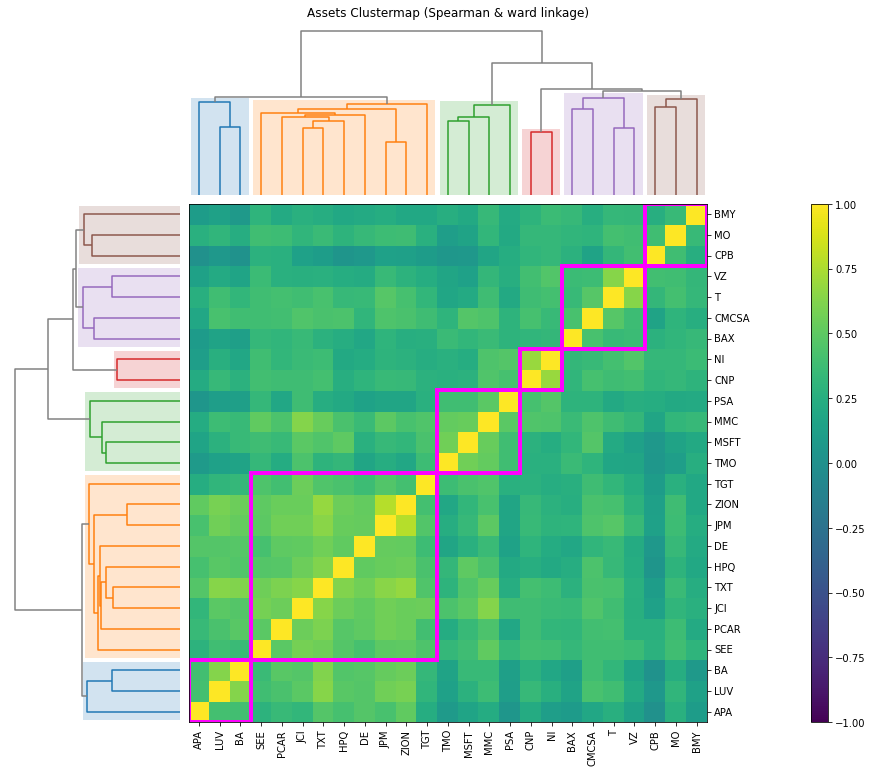

In [117]:
ax = rp.plot_clusters(returns=Y, codependence='spearman',
                      linkage='ward', k=None, max_k=10,
                      leaf_order=True, dendrogram=True, ax=None)

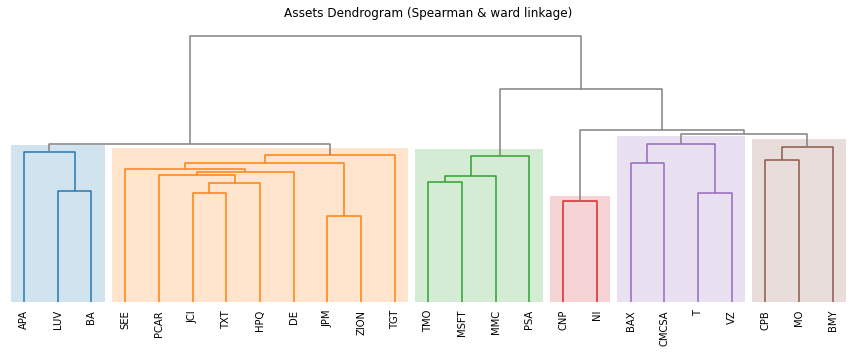

In [119]:
ax = rp.plot_dendrogram(returns=Y, codependence='spearman',
                        linkage='ward', k=None, max_k=10,
                        leaf_order=True, ax=None)

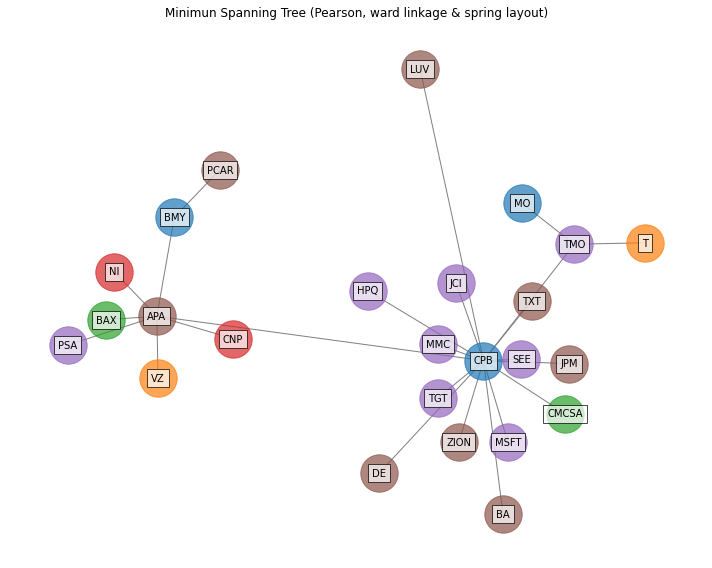

In [120]:
ax = rp.plot_network(returns=Y, codependence="pearson",
                     linkage="ward", k=None, max_k=10,
                     alpha_tail=0.05, leaf_order=True,
                     kind='spring', ax=None)

TypeError: ignored

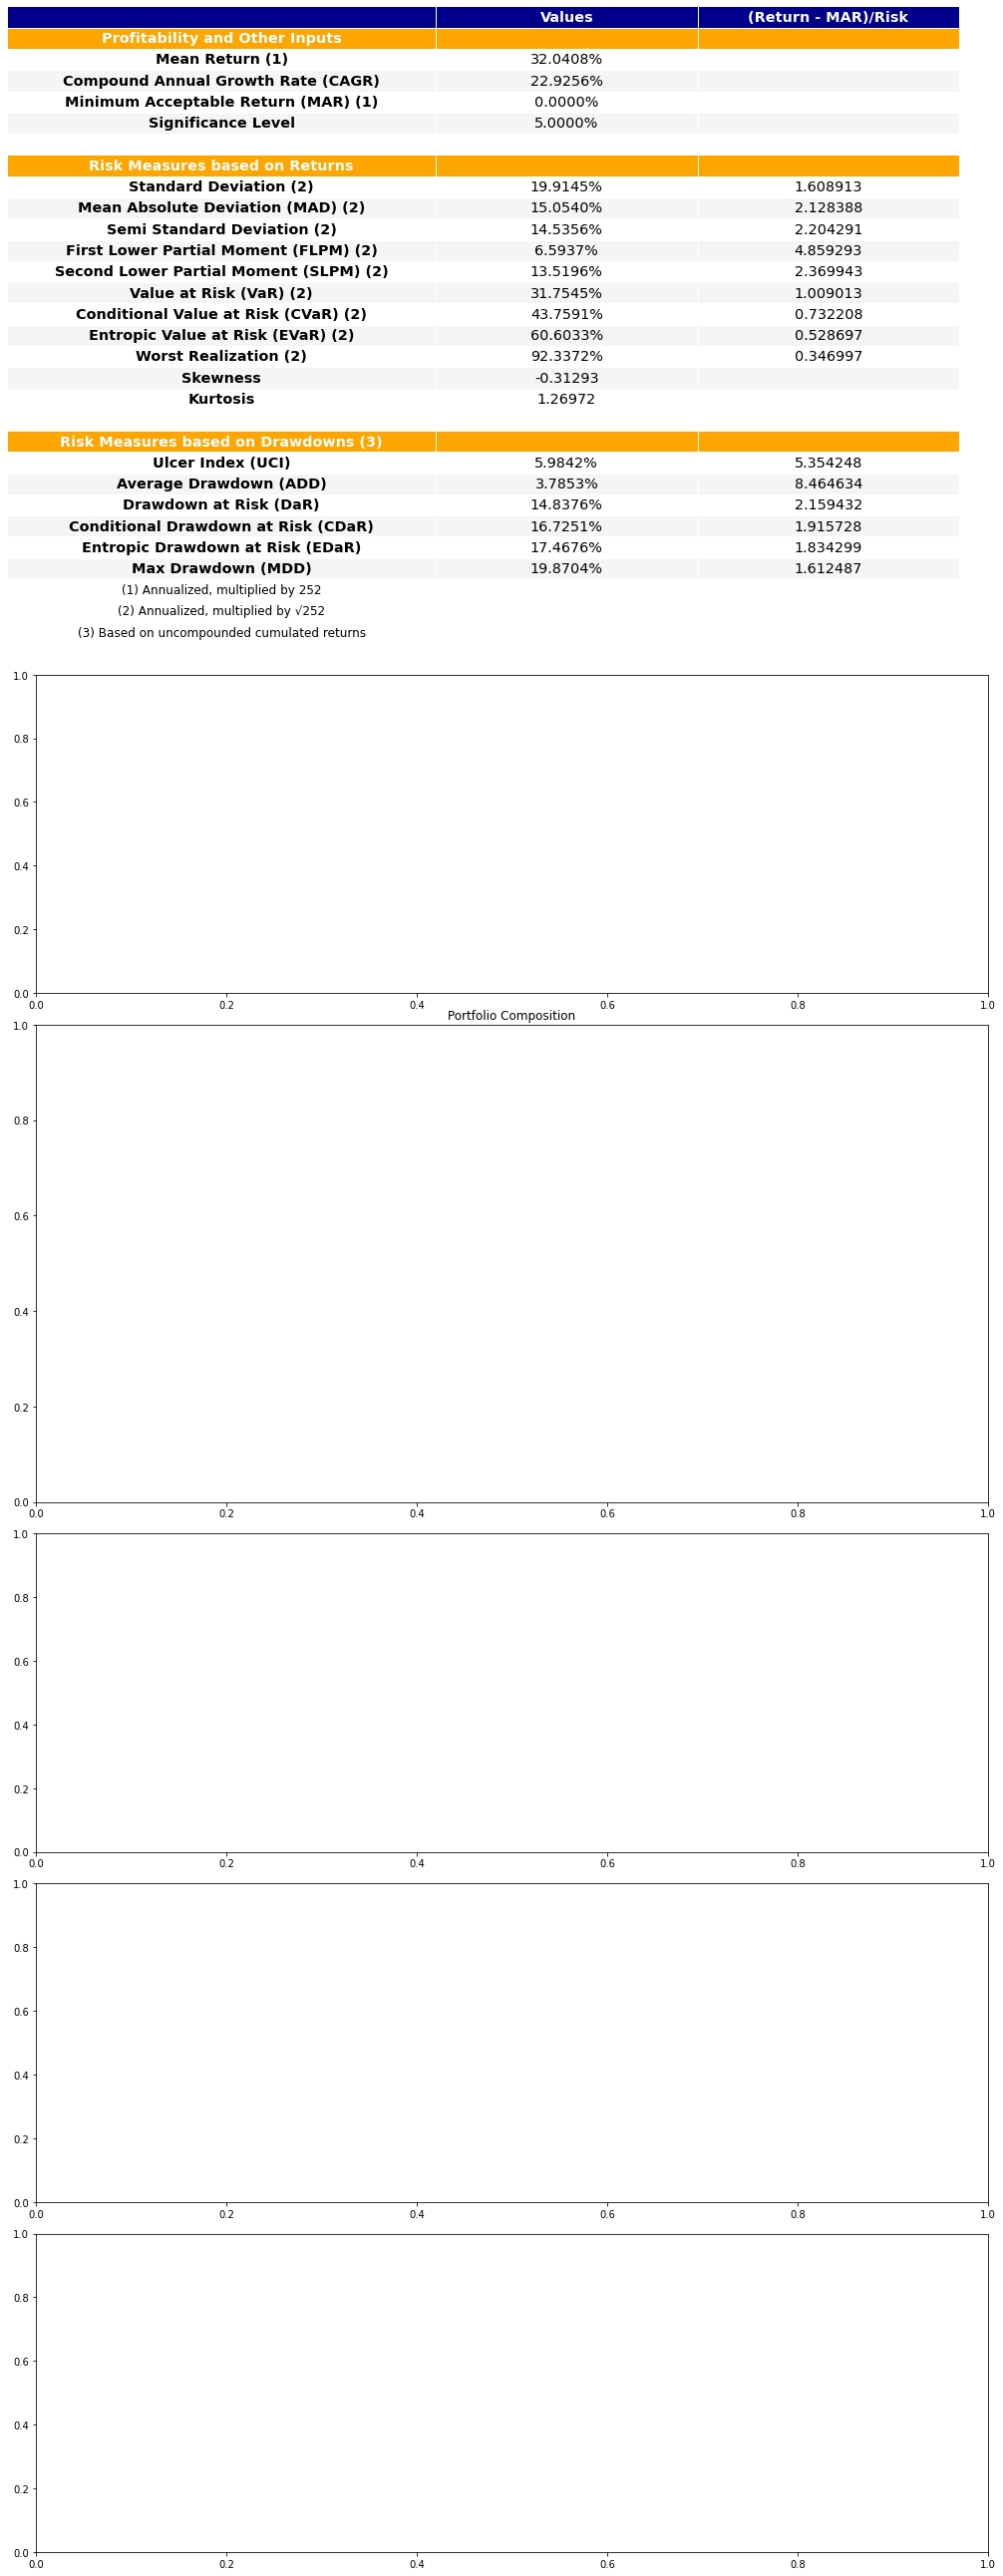

In [174]:
ax = rp.jupyter_report(returns, w, rm='MV', rf=0, alpha=0.05, height=6, width=14,
                       others=0.05, nrow=25)